# Testing head association

In [1]:
from scripts.imports import *

df_ph = pd.read_csv(paths['phrase_dataset'], index_col='node', low_memory=False)

df_sgph = df_ph[
    (df_ph.n_heads == 1)
    & (df_ph.n_phatoms == 1)
    & (df_ph.heads_POS != 'PREP')
].copy()

out = Exporter(
    paths['outdir'], 
    'head_association'
)

from matplotlib import colors

# Statistics for Time Words Generally

In [2]:
# multiple time words in same ph separated with |
# split the string on | and count individual vals
time_ct = df.times_utf8\
    .str.split('|')\
    .explode()\
    .value_counts()

time_pr = time_ct/time_ct.sum()

time_cp = join_ct_pr(time_ct, time_pr)

time_cp.head(20)

,count,percent
יֹום,1495,36%
שָׁנָה,431,10%
עַתָּה,368,9%
עֹולָם,217,5%
לַיְלָה,177,4%
עֵת,160,4%
בֹּקֶר,156,4%
חֹדֶשׁ,110,3%
עֶרֶב,98,2%
אָז,75,2%


In [3]:
out.number(
    time_cp.shape[0],
    'N_alltimewords',
)

'124'

In [129]:
out.number(
    df.shape[0],
    'N_alltimephrases',
)

'3,648'

In [4]:
time_ct_strs = []

for time in time_cp.index:
    ct,pc = time_cp.loc[time]
    if pc == '0%':
        pc = '<1%'
    pc = pc.replace('%','\%')
    ct = str(ct)+'x'
    time_ct_strs.append(f'{textheb(time)} {ct} ({pc})')

In [5]:
out.text(
    '; '.join(time_ct_strs),
    'all_time_words',
)

'\\texthebrew{יֹום} 1495x (36\\%); \\texthebrew{שָׁנָה} 431x (10\\%); \\texthebrew{עַתָּה} 368x (9\\%); \\texthebrew{עֹולָם} 217x (5\\%); \\texthebrew{לַיְלָה} 177x (4\\%); \\texthebrew{עֵת} 160x (4\\%); \\texthebrew{בֹּקֶר} 156x (4\\%); \\texthebrew{חֹדֶשׁ} 110x (3\\%); \\texthebrew{עֶרֶב} 98x (2\\%); \\texthebrew{אָז} 75x (2\\%); \\texthebrew{אַחַר} 69x (2\\%); \\texthebrew{כֵּן} 53x (1\\%); \\texthebrew{יֹומָם} 40x (1\\%); \\texthebrew{מָחָר} 39x (1\\%); \\texthebrew{דֹּור} 37x (1\\%); \\texthebrew{עַד} 32x (1\\%); \\texthebrew{תָּמִיד} 31x (1\\%); \\texthebrew{מָוֶת} 31x (1\\%); \\texthebrew{נֵצַח} 28x (1\\%); \\texthebrew{מָחֳרָת} 26x (1\\%); \\texthebrew{מָתַי} 25x (1\\%); \\texthebrew{פָּנֶה} 22x (1\\%); \\texthebrew{רִאשֹׁון} 20x (<1\\%); \\texthebrew{מֹועֵד} 17x (<1\\%); \\texthebrew{אֶחָד} 17x (<1\\%); \\texthebrew{שִׁלְשֹׁום} 16x (<1\\%); \\texthebrew{צָהֳרַיִם} 15x (<1\\%); \\texthebrew{תְּמֹול} 15x (<1\\%); \\texthebrew{אָן} 14x (<1\\%); \\texthebrew{שַׁבָּת} 13x (<1\\%); 

In [84]:
import matplotlib

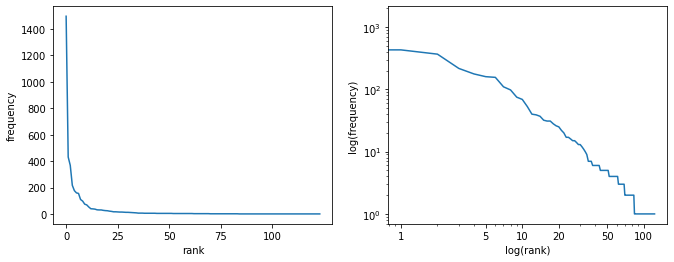

In [127]:
fig, axs = plt.subplots(1,2, figsize=(11, 4))
ax1,ax2 = axs

xticks = np.arange(time_ct.shape[0], step=25)
time_ct.plot(ax=ax1)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)
ax1.set_xlabel('rank')
ax1.set_ylabel('frequency')

time_ct.plot(logy=True, ax=ax2)
ax2.set_ylabel('log(frequency)')
ax2.set_xlabel('log(rank)')
xticks = [1, 5, 10, 20, 50, 100]
ax2.set_xscale('log')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
out.plot(
    'plot_zipfs_alltime'
)

## Sample the Heads dataset

In [6]:
df_sgph.shape

(87131, 60)

In [7]:
out.number(
    df_sgph.shape[0],
    'nphrases',
)

'87,131'

In [21]:
# prepare a sample to show in the thesis
get_cols = ['verse', 'text', 'heads_utf8', 'function', 'types']
show_sample = df_sgph[get_cols].sample(10, random_state=69420)\
    .rename(columns={'heads_utf8': 'head', 'text':'phrase'})
out.table(
    show_sample, 
    'sampletable',
    caption='Random Sample of the Phrase Dataset',
    escape=True,
    hebcols=['phrase', 'head']
)
show_sample

,verse,phrase,head,function,types
node,,,,,
739205,1 Sam 20:1,\texthebrew{עֲוֹנִ֤י},\texthebrew{עָוֹן},Subj,NP
864595,Prov 17:24,\texthebrew{אֶת־פְּנֵ֣י מֵבִ֣ין},\texthebrew{בין},PreC,PP
874578,Esth 3:7,\texthebrew{הוּא־},\texthebrew{הוּא},Subj,PPrP
776465,Isa 10:25,\texthebrew{עַל־תַּבְלִיתָֽם׃},\texthebrew{תַּבְלִית},PreC,PP
854285,Job 6:21,\texthebrew{עַ֭תָּה},\texthebrew{עַתָּה},Time,AdvP
757726,1 Kgs 10:2,\texthebrew{גְּ֠מַלִּים},\texthebrew{גָּמָל},Subj,NP
720905,Josh 18:9,\texthebrew{עַל־סֵ֑פֶר},\texthebrew{סֵפֶר},Cmpl,PP
896190,2 Chr 6:40,\texthebrew{לִתְפִלַּ֖ת הַמָּקֹ֥ום הַזֶּֽה׃ ס},\texthebrew{תְּפִלָּה},Cmpl,PP
752137,2 Sam 21:10,\texthebrew{אֶת־הַשַּׂ֜ק},\texthebrew{שַׂק},Objc,PP


## Explore functions

In [9]:
function_cts = df_sgph.function.value_counts().drop('Spec')
function_pr = function_cts / function_cts.sum()
function_cp = join_ct_pr(function_cts, function_pr)
function_cp = function_cp.T

out.table(function_cp, 
          'funct_counts', 
          caption='Sampled Phrase Function Frequencies',
         )

,Subj,Cmpl,Objc,PreC,Adju,Modi,Time,Loca
count,26228,18149,17019,9758,6952,3545,3244,2234
percent,30%,21%,20%,11%,8%,4%,4%,3%


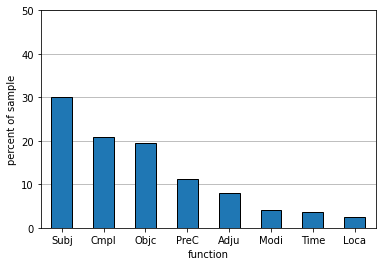

In [10]:
fig, ax = plt.subplots()
function_pr.mul(100).plot(kind='bar', ax=ax, edgecolor='black')
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('function')
ax.set_ylabel('percent of sample')
ax.set_ylim(0, 50)
out.plot('bar_function_perc')

In [11]:
df_sgph.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'heads_etcbc',
       'heads_utf8', 'heads_utf8d', 'heads_POS', 'Phrase Heads', 'function',
       'text', 'types', 'n_heads', 'word_lexs', 'n_words', 'n_phatoms',
       'clause_node', 'firstw', 'genre', 'domain', 'gendom', 'clause',
       'sentence', 'cl_rela', 'cl_type', 'cl_kind', 'verb', 'verb_etcbc',
       'verb_utf8', 'verb_text', 'verbform', 'verb_stem', 'cl_type2', 'PP',
       'unmodified', 'modtag', 'modtag2', 'PL', 'ØPP', 'PARA', 'DEF', 'GP',
       'main_genre', 'NUM', 'SPEC', 'ADJV', 'SFX3', 'SFX', 'APPO', 'QUANT',
       'SFX1', 'SFX2', 'ORDN', 'DU', 'CARDC', 'DEMON', 'HLOC', 'TIMEAPPO',
       'ADVB'],
      dtype='object')

In [12]:
type_cts = df_sgph.types.value_counts()
type_pr = type_cts / type_cts.sum()
type_cp = join_ct_pr(type_cts, type_pr)
type_cp = type_cp.T

out.table(type_cp, 
          'type_counts', 
          caption='Sampled Phrase Type Frequencies',
         )

,PP,NP,PrNP,AdvP,PPrP,AdjP
count,36449,33092,6943,5289,3903,1455
percent,42%,38%,8%,6%,4%,2%


In [13]:
# the combined % of minor types
percent_minortype = type_pr['PrNP':'AdjP'].sum() * 100

out.number(
    percent_minortype,
    'percent_minortype',
)

'20'

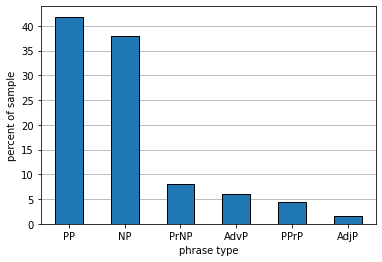

In [14]:
fig, ax = plt.subplots()
type_pr.mul(100).plot(kind='bar', ax=ax, edgecolor='black')
ax.set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_xlabel('phrase type')
ax.set_ylabel('percent of sample')
out.plot('bar_type_perc')

In [15]:
pp_np_diff = 100*(type_pr['PP'] - type_pr['NP'])

out.number(
    pp_np_diff,
    'pp_np_diff',
)

'4'

## Head lexeme association per function

In [16]:
lex_ct = pd.pivot_table(
    df_sgph,
    index=['heads_etcbc', 'heads_utf8'],
    columns='function',
    aggfunc='size',
    fill_value=0,
)

lex_ct = lex_ct.T
lex_ct = lex_ct.drop('Spec', 0)

lex_ct

heads_etcbc,<B/,<B=/,<B==/,<BD/,<BDH/,<BDH=/,<BDJH/,<BDJHW/,<BDT/,<BDWN/,...,ZRW<=/,ZRX=/,ZRXJH/,ZRZJR/,ZW<H/,ZW<[,ZWB/,ZWB[,ZWJT/,ZWZJM/
heads_utf8,עָב,עָב,עָב,עֶבֶד,עֲבֹדָה,עֲבֻדָּה,עֹבַדְיָה,עֹבַדְיָהוּ,עַבְדֻת,עַבְדֹּון,...,זֵרוּעַ,זֶרַח,זְרַחְיָה,זַרְזִיר,זְוָעָה,זוע,זֹוב,זוב,זָוִית,זוּזִים
function,,,,,,,,,,,,,,,,,,,,,
Adju,6,0,0,23,19,0,0,0,2,0,...,0,0,0,0,0,0,1,0,0,0
Cmpl,6,0,1,93,13,0,0,2,1,0,...,0,0,0,0,0,0,5,0,0,0
Loca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Modi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Objc,3,0,0,47,21,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,1
PreC,1,0,0,75,5,0,0,0,0,2,...,0,0,0,0,1,0,0,0,1,0
Subj,7,1,0,155,10,1,1,5,0,0,...,0,0,1,1,0,1,3,7,0,0
Time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
out.number(
    lex_ct.shape[1],
    'nlexemes',
)

'4,880'

In [22]:
# get an excerpt table for the thesis
lc_show = lex_ct[lex_ct.sum().sort_values(ascending=False).index].copy()
lc_show = lc_show.loc[lc_show.sum(1).sort_values(ascending=False).index]
lc_show = lc_show.iloc[:, :13].droplevel(['heads_etcbc'], 1)\
    .rename_axis(columns='head')
out.table(
    lc_show,
    'colexmatrix',
    caption=(
        'Top of the Function/Head Collocation Matrix '
        f'(original={lex_ct.shape[0]} × {lex_ct.shape[1]}) '
    ),
    adjustbox=True,
    hebaxis=1
)

head,\texthebrew{יְהוָה},\texthebrew{בֵּן},\texthebrew{יֹום},\texthebrew{אֶרֶץ},\texthebrew{אִישׁ},\texthebrew{יָד},\texthebrew{בַּיִת},\texthebrew{דָּבָר},\texthebrew{עַם},\texthebrew{מֶלֶךְ},\texthebrew{הוּא},\texthebrew{אֱלֹהִים},\texthebrew{שָׁם}
function,,,,,,,,,,,,,
Subj,2067,757,184,224,871,192,122,354,426,509,952,429,0
Cmpl,701,325,36,726,184,485,524,95,332,299,0,216,341
Objc,180,268,84,306,187,273,243,495,249,100,0,116,0
PreC,222,301,74,130,133,128,113,62,87,50,15,125,92
Adju,151,107,41,47,104,135,66,139,54,43,0,34,4
Modi,0,0,1,2,1,2,0,0,1,1,0,0,61
Time,0,0,1281,0,0,0,0,13,0,0,0,0,0
Loca,20,6,0,221,0,22,97,0,3,1,0,0,312


In [23]:
lex_fs, lex_odds = sig.apply_fishers(lex_ct, 0, 1)

In [24]:
# replace infinite values (P=0)
fishermax = lex_fs[np.isfinite(lex_fs)].max().max()
fishermin = lex_fs[np.isfinite(lex_fs)].min().min()
lex_fs = lex_fs.replace(np.inf, fishermax)
lex_fs = lex_fs.replace(-np.inf, fishermin)

# Visualizing Attraction

In [42]:
class MidpointNormalize(colors.Normalize):
    """Normalize values to 0-1 for color selection.
    
    This class was modified from:
    https://matplotlib.org/stable/tutorials/colors/colormapnorms
    .html#custom-normalization-manually-implement-two-linear-ranges
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.interp(value, x, y)

def stripplot_divcolors(x, maxval, midpoint, minval, cmap):
    """Format diverging colors for a Seaborn stripplot.
    
    Args:
        x: scalar (list, array)
        maxval: vmax for color normalization 
            (see color Normalizers in matplotlib)
        midpoint: value to center the divergence on
        minval: vmin for color normalization 
        cmap: matplotlib cmap object
        
    Returns:
        (hue, palette) - where hue is an array that corresponds
            with x, where each value has been mapped to a color
            linearly with a specified midpoint; palette is a dict
            that maps each unique mapped value is mapped to RGBA
            array for seaborn.stripplot paletter arg
    """
    # maps x-values to 0-1 for cmap
    normalizer = MidpointNormalize(
        vmin=fishermin, 
        vmax=fishermax, 
        midpoint=0,
    )
    # these are the 1-to-1 normalized values
    hue = normalizer(data)
    
    # this dict maps each unique, normalized value 
    # to its RGBA representation; this is used by the stripplot
    # argument "palette"
    unique_hue = np.unique(hue)
    palette = dict(
        zip(unique_hue, cmap(unique_hue))
    )

    # done!
    return (hue, palette)

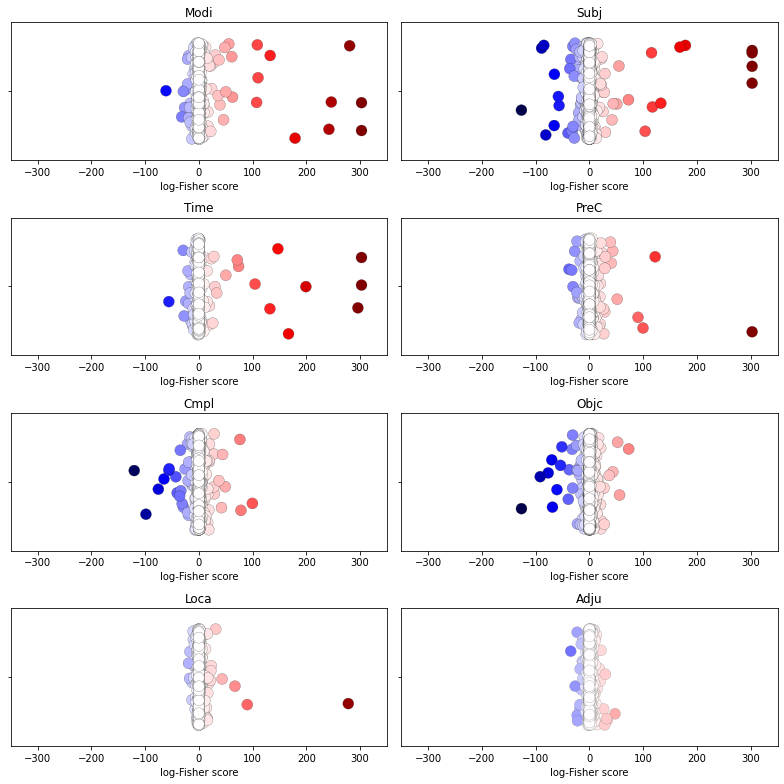

In [43]:
ordered_functs = [
    'Modi', 'Subj',
    'Time','PreC',
    'Cmpl', 'Objc',
    'Loca', 'Adju', 
]

fig, axs = plt.subplots(4, 2, figsize=(11,11))
axs = axs.ravel()
cmap = plt.get_cmap('seismic')

for i, function in enumerate(ordered_functs):
    
    data = lex_fs.loc[function]

    # since there are a lot of zero values which stack up onto each other,
    # we do not need to plot all of them; plotting a subset will look exactly
    # the same and be much more efficient + create a smaller sized image
    notzero = data[data != 0].values
    zero = data[data == 0].values[:100]
    data = np.concatenate([notzero, zero])

    # get diverging colors for stripplot
    hue, palette = stripplot_divcolors(
        data,
        fishermin+50,
        0,
        fishermax-50,
        cmap
    )

    # plot the data
    ax = axs[i]
    dummyY = ['']*data.shape[0] # needed due to bug with Y & hue
    sns.stripplot(
         ax=ax,
         x=data, 
         y=dummyY,
         jitter=0.35,
         s=11,
         linewidth=0.2,
         hue=hue,
         palette=palette,
    )
    ax.legend_.remove()
    ax.set_title(f'{function}')
    ax.set_xlim(-350, 350)
    ax.set_xlabel('log-Fisher score')
    
plt.tight_layout()
out.plot('attraction_plot')

## Quantifying Attraction

In [25]:
def countsig(series, sig=50, sign='>'):
    """Count the number of statistically significant scores in a series."""
    if sign == '>':
        return series[series >= sig].size
    elif sign == '<':
        return series[series <= sig].size

### N-statistically significant values

Number of items with statistically significant attraction:

In [26]:
sig_cts = lex_fs.agg(
    countsig,
    axis=1,
    sig=1.3).sort_values(ascending=False)

sig_cts

Objc    473
Cmpl    345
PreC    329
Adju    298
Subj    269
Modi    213
Loca    155
Time     50
dtype: int64

As a perc. of the function:

In [27]:
(sig_cts / lex_ct.sum(1))

Adju    0.042865
Cmpl    0.019009
Loca    0.069382
Modi    0.060085
Objc    0.027792
PreC    0.033716
Subj    0.010256
Time    0.015413
dtype: float64

In [28]:
sig_prop = (sig_cts / ((lex_ct > 0) * 1).sum(1)).sort_values(ascending=False)
sig_prop = pd.DataFrame(sig_prop).T\
    .set_axis(['prop.'], 0)

sig_prop

,Modi,Time,Loca,Objc,Adju,PreC,Cmpl,Subj
prop.,0.606838,0.490196,0.429363,0.210503,0.198799,0.174351,0.166989,0.110836


Text(0.5, 0, 'function')

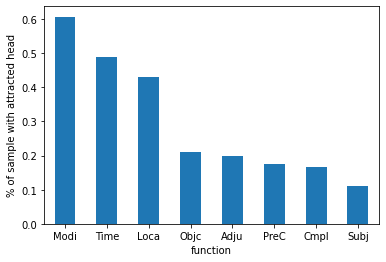

In [29]:
fig, ax = plt.subplots()
sig_prop.loc['prop.'].plot(kind='bar', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('% of sample with attracted head')
ax.set_xlabel('function')

Number of highly attracted items:

In [30]:
n_strong = lex_fs.agg(
    countsig,
    axis=1,
    sig=50)\
    .sort_values(ascending=False)

n_strong = pd.DataFrame(n_strong).T\
    .set_axis(['total'], 0)

out.table(
    n_strong,
    'Nstrong',
    caption='Number of Strongly Attracted Lexemes (log-Fisher ≥50)'
)

n_strong

,Modi,Subj,Time,PreC,Cmpl,Loca,Objc,Adju
total,14,13,11,5,3,3,3,0


In [31]:
n_repulse = lex_fs.agg(
    countsig,
    axis=1,
    sig=-30,
    sign='<'
    )\
    .sort_values(ascending=False)

n_repulse = pd.DataFrame(n_repulse).T\
    .set_axis(['total'], 0)

out.table(
    n_repulse,
    'Nrepulse',
    caption='Number of Strongly Repulsed Lexemes (log-Fisher ≤-50)'
)

n_repulse

,Subj,Objc,Cmpl,PreC,Modi,Adju,Time,Loca
total,14,13,12,3,2,1,1,0


###  Lexical Diversity


Determine how many head lexemes per 100 uses are found for each function.
Adapted from ["Normalizing Word Counts"](http://www.thegrammarlab.com/?nor-portfolio=normalizing-word-counts).

In [32]:
lex_ctT = lex_ct.T
is_attested = (lex_ctT > 0) * 1
n_attested = is_attested.sum()
head_per_100 = (n_attested / lex_ctT.sum()) * 100 # normalize per 100 uses of the function
head_per_100 = head_per_100.sort_values(ascending=False)

In [33]:
lex_data = (
    pd.concat([n_attested, head_per_100], 1)
    .set_axis(['total', 'per 100x'], 1)
    .rename_axis('unique heads', axis=1)
    .round(2)
    .sort_values(by='per 100x', ascending=False)
)

out.table(
    lex_data,
    'uniqueper100',
    caption='Unique head lexeme frequencies per 100 uses'
)

unique heads,total,per 100x
function,,
Adju,1499,21.56
PreC,1887,19.34
Loca,361,16.16
Objc,2247,13.20
Cmpl,2066,11.38
Modi,351,9.90
Subj,2427,9.25
Time,102,3.14


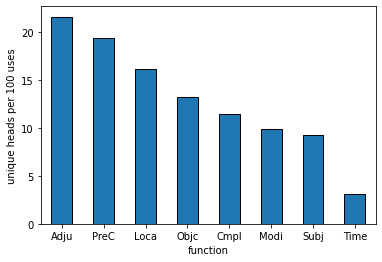

In [34]:
fig, ax = plt.subplots()
lex_data['per 100x'].plot(kind='bar', ax=ax, edgecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('unique heads per 100 uses')
out.plot('bar_uniqueper100')

### Attracted head by function

In [38]:
lex_fs

,<B/,<B=/,<B==/,<BD/,<BDH/,<BDH=/,<BDJH/,<BDJHW/,<BDT/,<BDWN/,...,ZRW<=/,ZRX=/,ZRXJH/,ZRZJR/,ZW<H/,ZW<[,ZWB/,ZWB[,ZWJT/,ZWZJM/
,עָב,עָב,עָב,עֶבֶד,עֲבֹדָה,עֲבֻדָּה,עֹבַדְיָה,עֹבַדְיָהוּ,עַבְדֻת,עַבְדֹּון,...,זֵרוּעַ,זֶרַח,זְרַחְיָה,זַרְזִיר,זְוָעָה,זוע,זֹוב,זוב,זָוִית,זוּזִים
Adju,2.100649,0.000000,0.00000,-0.870433,6.011502,0.000000,0.000000,0.000000,1.742774,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248230,0.000000,0.000000,0.000000
Cmpl,0.217617,0.000000,0.68131,0.767659,-0.054926,0.000000,0.000000,0.193179,0.297762,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.413574,-0.446685,0.000000,0.000000
Loca,0.000000,0.000000,0.00000,-4.131801,-0.372406,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Modi,0.000000,0.000000,0.00000,-6.894116,-0.929954,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Objc,-0.221082,0.000000,0.00000,-4.137296,1.515492,0.000000,0.000000,-0.445501,0.000000,0.000000,...,0.709229,0.709229,0.452829,0.000000,0.000000,0.000000,-0.156020,-0.445501,0.000000,0.709229
PreC,-0.295241,0.000000,0.00000,5.391338,-0.356964,0.000000,0.000000,0.000000,0.000000,1.901643,...,0.000000,0.000000,0.000000,0.000000,0.950802,0.000000,-0.210811,0.000000,0.950802,0.000000
Subj,-0.000000,0.521398,0.00000,4.064789,-2.295618,0.521398,0.521398,1.534325,-0.252759,0.000000,...,0.000000,0.000000,0.291208,0.521398,0.000000,0.521398,0.000000,3.650026,0.000000,0.000000
Time,0.000000,0.000000,0.00000,-6.189965,-0.733090,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
# gather dfs of dat with word associations

top_heads = [] 
for funct in lex_fs.index:
    
    fishers = lex_fs.loc[funct]\
        .sort_values(ascending=False)\
        .round().astype(int)
    
    totals = lex_ct.loc[funct]\
        .sort_values(ascending=False)
    
    prop = ((totals / totals.sum()) * 100).round(1).astype(str) + '%'
    
    word_df = pd.concat([totals, prop, fishers], 1)\
        .droplevel([0], 0)\
        .reset_index()\
        .set_axis(['lexeme', 'totals', '%', 'Fishers'], 1)\
        .sort_values(ascending=False, by='Fishers')\
        .set_axis(np.arange(1, totals.index.shape[0]+1))\
        .rename_axis(index='rank')
    
    word_df.lexeme = word_df.lexeme.apply(textheb)
        
        
    top_heads.append(word_df)

In [43]:
top_heads[0].head()

,lexeme,totals,%,Fishers
rank,,,,
1,\texthebrew{כֵּן},159,2.3%,48
2,\texthebrew{פֶּה},114,1.6%,33
3,\texthebrew{זֹאת},51,0.7%,32
4,\texthebrew{רֹב},32,0.5%,30
5,\texthebrew{חֶרֶב},88,1.3%,28


In [44]:
lex_comb = pd.concat(top_heads, axis=1, keys=lex_fs.index)
lex_comb.head()

Adju                                            Cmpl  \
                  lexeme totals     % Fishers                     lexeme   
rank                                                                       
1      \texthebrew{כֵּן}    159  2.3%      48         \texthebrew{אֶרֶץ}   
2      \texthebrew{פֶּה}    114  1.6%      33  \texthebrew{יְרוּשָׁלִַם}   
3      \texthebrew{זֹאת}     51  0.7%      32        \texthebrew{בַּיִת}   
4       \texthebrew{רֹב}     32  0.5%      30           \texthebrew{יָד}   
5     \texthebrew{חֶרֶב}     88  1.3%      28     \texthebrew{מִצְרַיִם}   

                                            Loca         ...  PreC          \
     totals     % Fishers                 lexeme totals  ...     % Fishers   
rank                                                     ...                 
1       726  4.0%     100      \texthebrew{שָׁם}    312  ...  3.5%     303   
2       246  1.4%      78     \texthebrew{אֶרֶץ}    221  ...  2.1%     122   
3       524  2.9%      76  \texthebrew{מִדְבָּר}     76  ...  1.4%     100   
4       485  2.7%      49       \texthebrew{הַר}     74  ...  1.2%      90   
5       164  0.9%      44    \texthebrew{מָקֹום}     56  ...  0.6%      52   

                      Subj                                       Time         \
                    lexeme totals     % Fishers                lexeme totals   
rank                                                                           
1       \texthebrew{אֲנִי}    742  2.8%     303   \texthebrew{עַתָּה}    356   
2      \texthebrew{אַתָּה}    640  2.4%     303     \texthebrew{יֹום}   1281   
3      \texthebrew{יְהוָה}   2067  7.9%     303   \texthebrew{שָׁנָה}    262   
4        \texthebrew{הוּא}    952  3.6%     303   \texthebrew{עֹולָם}    183   
5     \texthebrew{אָנֹכִי}    341  1.3%     178  \texthebrew{לַיְלָה}    133   

                     
          % Fishers  
rank                 
1     11.0%     303  
2     39.5%     303  
3      8.1%     296  
4      5.6%     199  
5      4.1%     167  

[5 rows x 32 columns]

In [45]:
exportn = 15

out.number(exportn, 'top_n_scores')

'15'

In [46]:
# export the top 3

mst_lexs = lex_comb[['Modi', 'Subj', 'Time']].head(exportn)

out.table(
    mst_lexs,
    'mst_lexs',
    caption=f'Top {exportn} Associated Head Lexemes by Function',
    adjustbox=True,
)

Modi                                          Subj  \
                     lexeme totals      % Fishers                  lexeme   
rank                                                                        
1         \texthebrew{כֹּה}    565  15.9%     303      \texthebrew{אֲנִי}   
2         \texthebrew{עֹוד}    415  11.7%     303     \texthebrew{אַתָּה}   
3        \texthebrew{לָכֵן}    200   5.6%     280     \texthebrew{יְהוָה}   
4         \texthebrew{כֵּן}    287   8.1%     246       \texthebrew{הוּא}   
5        \texthebrew{מְאֹד}    197   5.6%     242    \texthebrew{אָנֹכִי}   
6         \texthebrew{גַּם}    128   3.6%     179       \texthebrew{הִיא}   
7     \texthebrew{יַחְדָּו}     95   2.7%     133     \texthebrew{אַתֶּם}   
8       \texthebrew{סָבִיב}    126   3.6%     110      \texthebrew{אִישׁ}   
9          \texthebrew{אַף}     78   2.2%     109     \texthebrew{הֵמָּה}   
10        \texthebrew{אַךְ}     77   2.2%     107        \texthebrew{הֵם}   
11      \texthebrew{אוּלַי}     45   1.3%      63    \texthebrew{אֲדֹנָי}   
12      \texthebrew{פַּעַם}     60   1.7%      61     \texthebrew{דָּוִד}   
13       \texthebrew{יַחַד}     43   1.2%      56  \texthebrew{אֲנַחְנוּ}   
14         \texthebrew{רַק}     36   1.0%      50     \texthebrew{כֹּהֵן}   
15         \texthebrew{מות}     54   1.5%      48     \texthebrew{מֶלֶךְ}   

                                           Time                        
     totals     % Fishers                lexeme totals      % Fishers  
rank                                                                   
1       742  2.8%     303   \texthebrew{עַתָּה}    356  11.0%     303  
2       640  2.4%     303     \texthebrew{יֹום}   1281  39.5%     303  
3      2067  7.9%     303   \texthebrew{שָׁנָה}    262   8.1%     296  
4       952  3.6%     303   \texthebrew{עֹולָם}    183   5.6%     199  
5       341  1.3%     178  \texthebrew{לַיְלָה}    133   4.1%     167  
6       330  1.3%     168      \texthebrew{עֵת}    144   4.4%     147  
7       254  1.0%     133   \texthebrew{בֹּקֶר}    116   3.6%     132  
8       871  3.3%     117    \texthebrew{עֶרֶב}     83   2.6%     105  
9       241  0.9%     115      \texthebrew{אָז}     77   2.4%      74  
10      206  0.8%     104   \texthebrew{חֹדֶשׁ}     67   2.1%      72  
11      199  0.8%      73    \texthebrew{מָחָר}     37   1.1%      50  
12      381  1.5%      55  \texthebrew{מָחֳרָת}     25   0.8%      33  
13      101  0.4%      51    \texthebrew{מָתַי}     25   0.8%      30  
14      235  0.9%      44    \texthebrew{נֵצַח}     26   0.8%      28  
15      509  1.9%      42  \texthebrew{תָּמִיד}     30   0.9%      26

In [47]:
# export the top 3

pco_lexs = lex_comb[['PreC', 'Cmpl', 'Objc']].head(exportn)

out.table(
    pco_lexs,
    'pco_lexs',
    caption=f'Top {exportn} Associated Head Lexemes by Function',
    adjustbox=True,
)

PreC                                            Cmpl  \
                    lexeme totals     % Fishers                     lexeme   
rank                                                                         
1       \texthebrew{נְאֻם}    341  3.5%     303         \texthebrew{אֶרֶץ}   
2        \texthebrew{טֹוב}    202  2.1%     122  \texthebrew{יְרוּשָׁלִַם}   
3      \texthebrew{אַמָּה}    136  1.4%     100        \texthebrew{בַּיִת}   
4         \texthebrew{חַי}    116  1.2%      90           \texthebrew{יָד}   
5         \texthebrew{נצח}     56  0.6%      52     \texthebrew{מִצְרַיִם}   
6      \texthebrew{קָרֹוב}     56  0.6%      43          \texthebrew{שָׁם}   
7     \texthebrew{גָּדֹול}     59  0.6%      40        \texthebrew{מָקֹום}   
8         \texthebrew{רַב}     78  0.8%      39          \texthebrew{עִיר}   
9         \texthebrew{רַע}     80  0.8%      30         \texthebrew{אֹהֶל}   
10      \texthebrew{טָמֵא}     42  0.4%      28        \texthebrew{בָּבֶל}   
11     \texthebrew{עָשָׂר}     42  0.4%      28           \texthebrew{הַר}   
12      \texthebrew{מֵאָה}     44  0.5%      27    \texthebrew{יִשְׂרָאֵל}   
13     \texthebrew{יָשָׁר}     44  0.5%      26        \texthebrew{מֹשֶׁה}   
14     \texthebrew{אֶשֶׁר}     26  0.3%      23       \texthebrew{דֶּרֶךְ}   
15     \texthebrew{חָמֵשׁ}     40  0.4%      21       \texthebrew{אֲדָמָה}   

                                             Objc                       
     totals     % Fishers                  lexeme totals     % Fishers  
rank                                                                    
1       726  4.0%     100     \texthebrew{דָּבָר}    495  2.9%      73  
2       246  1.4%      78     \texthebrew{בֶּגֶד}    121  0.7%      56  
3       524  2.9%      76    \texthebrew{בְּרִית}    125  0.7%      52  
4       485  2.7%      49      \texthebrew{לֶחֶם}    132  0.8%      43  
5       164  0.9%      44     \texthebrew{פָּנֶה}    176  1.0%      37  
6       341  1.9%      42        \texthebrew{חֵן}     51  0.3%      28  
7       160  0.9%      37     \texthebrew{נֶפֶשׁ}    224  1.3%      27  
8       255  1.4%      29       \texthebrew{דָּם}    128  0.8%      24  
9       111  0.6%      28     \texthebrew{כֶּסֶף}     95  0.6%      23  
10       70  0.4%      28    \texthebrew{מִצְוָה}     64  0.4%      21  
11      170  0.9%      28       \texthebrew{שֵׁם}    259  1.5%      21  
12      224  1.2%      20    \texthebrew{עֶרְוָה}     39  0.2%      21  
13      205  1.1%      19      \texthebrew{זָהָב}     67  0.4%      20  
14      197  1.1%      19  \texthebrew{מִשְׁפָּט}    118  0.7%      17  
15       89  0.5%      19      \texthebrew{רָעָה}    107  0.6%      16

In [48]:
la_lexs = lex_comb[['Loca', 'Adju']].head(exportn)

out.table(
    la_lexs,
    'la_lexs',
    caption=f'Top {exportn} Associated Head Lexemes by Function',
)

Loca                                          Adju  \
                         lexeme totals      % Fishers                  lexeme   
rank                                                                            
1             \texthebrew{שָׁם}    312  14.0%     278       \texthebrew{כֵּן}   
2            \texthebrew{אֶרֶץ}    221   9.9%      90       \texthebrew{פֶּה}   
3         \texthebrew{מִדְבָּר}     76   3.4%      67       \texthebrew{זֹאת}   
4              \texthebrew{הַר}     74   3.3%      43        \texthebrew{רֹב}   
5           \texthebrew{מָקֹום}     56   2.5%      31      \texthebrew{חֶרֶב}   
6           \texthebrew{בַּיִת}     97   4.3%      23      \texthebrew{עַיִן}   
7           \texthebrew{שָׂדֶה}     36   1.6%      22     \texthebrew{בֶּטַח}   
8     \texthebrew{יְרוּשָׁלִַם}     52   2.3%      22        \texthebrew{מָה}   
9          \texthebrew{שֶׁמֶשׁ}     25   1.1%      18      \texthebrew{אַיִן}   
10            \texthebrew{פֹּה}     19   0.9%      17  \texthebrew{מִשְׁפָּט}   
11           \texthebrew{קֶרֶב}     32   1.4%      16     \texthebrew{עֲבוּר}   
12          \texthebrew{פֶּתַח}     26   1.2%      16    \texthebrew{שָׁלֹום}   
13            \texthebrew{חוּץ}     22   1.0%      16       \texthebrew{עֹור}   
14          \texthebrew{שַׁעַר}     33   1.5%      15      \texthebrew{מַעַל}   
15        \texthebrew{שָׁמַיִם}     31   1.4%      15     \texthebrew{נֶשֶׁר}   

                           
     totals     % Fishers  
rank                       
1       159  2.3%      48  
2       114  1.6%      33  
3        51  0.7%      32  
4        32  0.5%      30  
5        88  1.3%      28  
6       150  2.2%      26  
7        27  0.4%      21  
8        34  0.5%      20  
9        28  0.4%      20  
10       72  1.0%      18  
11       15  0.2%      14  
12       49  0.7%      13  
13       25  0.4%      13  
14       22  0.3%      12  
15       14  0.2%      11

In [49]:
# export the high number of JWMs
out.number(
    float(mst_lexs['Time'].loc[2]['%'].replace('%','')),
    'perc_day',
)

'40'

In [50]:
perc_modis =  mst_lexs['Modi']\
    .iloc[:4]['%']\
    .str.replace('%','')\
    .astype(float).sum()

out.number(
    mst_lexs['Modi'].iloc[:4]['%'].str.replace('%','').astype(float).sum(),
    'perc_modis',
)

'41'

What % of Subj is personal pronouns?

In [51]:
subj_headpos = df_sgph[df_sgph.function=='Subj'].heads_POS.value_counts()

subj_headpos

NOUN     15754
PROPN     6056
PRPS      3889
QUANT      242
CARD1      160
CARD        47
ORDN        42
PRDE        37
INTJ         1
Name: heads_POS, dtype: int64

In [52]:
subj_headpos_pr = subj_headpos / subj_headpos.sum()

subj_headpos_pr

NOUN     0.600656
PROPN    0.230898
PRPS     0.148277
QUANT    0.009227
CARD1    0.006100
CARD     0.001792
ORDN     0.001601
PRDE     0.001411
INTJ     0.000038
Name: heads_POS, dtype: float64

In [53]:
out.number(
    subj_headpos_pr['PRPS']*100,
    'subjprps'
)
out.number(
    subj_headpos_pr['PROPN']*100,
    'subjpropn'
)

'23'